In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras

# Data Analysis

In [2]:
folder_path = 'experimental_data\Abasalt'

In [3]:
data = pd.read_csv(folder_path+"\output.csv")
data = data.reset_index(drop=True)

In [4]:
data.head()

,Serial Port,Voltage (V),Average X,Average Y,Average Z
0,COM16,0.284687,-33.67,14.96,-108.43
1,COM18,0.284687,-26.25,30.57,-28.68
2,COM19,0.284687,1.08,9.09,36.21
3,COM20,0.284687,40.85,-34.83,16.15
4,COM21,0.284687,-1.78,39.57,-91.27


In [25]:
sensor1 = data.iloc[3::5]
sensor1

,Serial Port,Voltage (V),Average X,Average Y,Average Z
3,COM20,0.284687,40.85,-34.83,16.15
8,COM20,0.247890,37.74,9.24,4.37
13,COM20,0.295013,38.11,9.36,17.98
18,COM20,0.082002,-22.34,9.36,-45.88
23,COM20,0.191341,-21.08,10.01,-13.19
...,...,...,...,...,...
4978,COM20,0.023503,38.07,-36.10,-62.97
4983,COM20,0.146908,36.04,8.12,-27.34
4988,COM20,0.149209,-19.02,-34.07,-24.86
4993,COM20,0.195522,39.54,-34.95,-11.90


Text(0, 0.5, 'Average X')

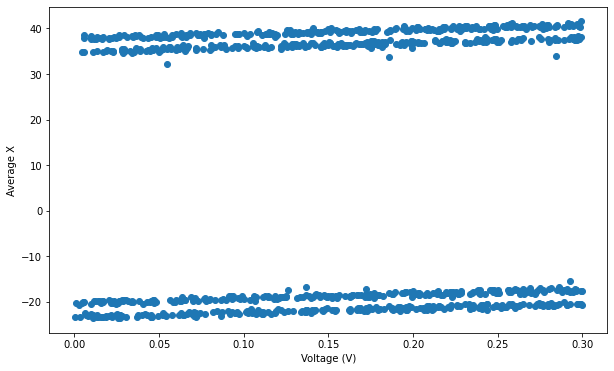

In [26]:
name = 'Average X'
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size
plt.scatter(sensor1['Voltage (V)'], sensor1[name])
plt.xlabel('Voltage (V)')
plt.ylabel(name)

Text(0, 0.5, 'Average Y')

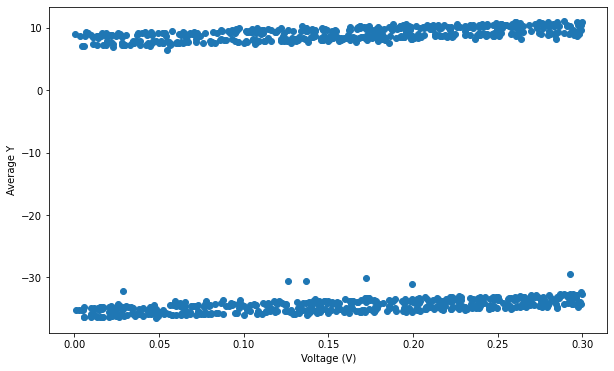

In [27]:
name = 'Average Y'
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size
plt.scatter(sensor1['Voltage (V)'], sensor1[name])
plt.xlabel('Voltage (V)')
plt.ylabel(name)

Text(0, 0.5, 'Average Z')

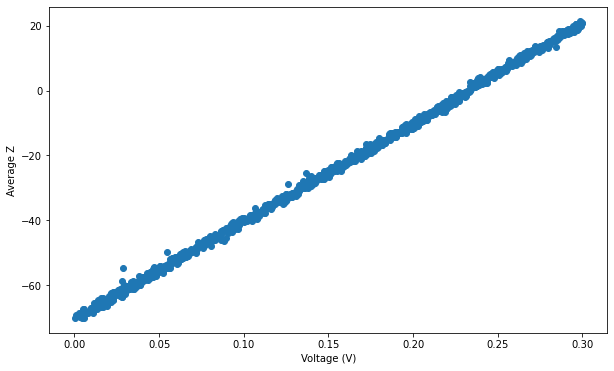

In [28]:
name = 'Average Z'
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size
plt.scatter(sensor1['Voltage (V)'], sensor1[name])
plt.xlabel('Voltage (V)')
plt.ylabel(name)

In [9]:
sensor1.iloc[0,0]

'COM18'

# Create training sets

In [10]:
array1 = data.iloc[0::5,-3:].to_numpy()
array2 = data.iloc[1::5,-3:].to_numpy()
array3 = data.iloc[2::5,-3:].to_numpy()
array4 = data.iloc[4::5,-3:].to_numpy()

In [11]:
X = np.hstack((array1, array2, array3))#, array4))
X

array([[ -33.67,   14.96, -108.43, ...,    1.08,    9.09,   36.21],
       [ -34.61,   37.3 ,  -97.36, ...,    3.29,   52.59,   23.79],
       [ -34.45,   41.5 , -103.51, ...,    2.51,   53.68,   38.36],
       ...,
       [ -38.01,    6.33,  -87.62, ...,  -62.64,   11.67,   -5.55],
       [ -34.44,    6.21,  -95.62, ...,    2.14,    7.59,    9.11],
       [ -39.3 ,   -6.87,  -68.05, ...,  -60.37,    9.3 ,  -48.74]])

In [12]:
Y = data.iloc[3::5,-3:].to_numpy()

In [13]:
Y

array([[ 40.85, -34.83,  16.15],
       [ 37.74,   9.24,   4.37],
       [ 38.11,   9.36,  17.98],
       ...,
       [-19.02, -34.07, -24.86],
       [ 39.54, -34.95, -11.9 ],
       [-20.44, -34.92, -67.26]])

In [14]:
from sklearn.model_selection import train_test_split

# split X and V0 into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

# split X_test and V0_test into valuation and testing sets
X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size=0.5, random_state=42)

# Train

In [15]:
model_m = keras.models.Sequential([
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(3)
])
# Compile model
model_m.compile(loss="mae", optimizer = keras.optimizers.Adam(),metrics=["mae"])

In [16]:
# Callbacks
early_stopping_cb = keras.callbacks.EarlyStopping(patience=500, monitor='val_loss',restore_best_weights=True) # Stop training if validation loss is not improving
learning_rate_cb = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=300) # Reduce learning rate is the validation loss is not improving

In [17]:
# Train
history = model_m.fit(X_train, Y_train, epochs=5000, validation_data=(X_val, Y_val), batch_size=16, callbacks=[early_stopping_cb, learning_rate_cb], verbose=True)

Epoch 1/5000


38/38 [==============================] - 5s 9ms/step - loss: 14.3560 - mae: 14.3560 - val_loss: 5.0945 - val_mae: 5.0945 - lr: 0.0010
Epoch 2/5000
38/38 [==============================] - 0s 4ms/step - loss: 2.2897 - mae: 2.2897 - val_loss: 1.4759 - val_mae: 1.4759 - lr: 0.0010
Epoch 3/5000
38/38 [==============================] - 0s 6ms/step - loss: 1.1055 - mae: 1.1055 - val_loss: 1.2819 - val_mae: 1.2819 - lr: 0.0010
Epoch 4/5000
38/38 [==============================] - 0s 5ms/step - loss: 1.0720 - mae: 1.0720 - val_loss: 1.4091 - val_mae: 1.4091 - lr: 0.0010
Epoch 5/5000
38/38 [==============================] - 0s 5ms/step - loss: 1.0409 - mae: 1.0409 - val_loss: 0.9256 - val_mae: 0.9256 - lr: 0.0010
Epoch 6/5000
38/38 [==============================] - 0s 4ms/step - loss: 0.9732 - mae: 0.9732 - val_loss: 0.9371 - val_mae: 0.9371 - lr: 0.0010
Epoch 7/5000
38/38 [==============================] - 0s 5ms/step - loss: 0.7710 - mae: 0.7710 - val_loss: 0.6657 - val_mae: 0.6657 - lr: 0.0

Text(0, 0.5, 'mae')

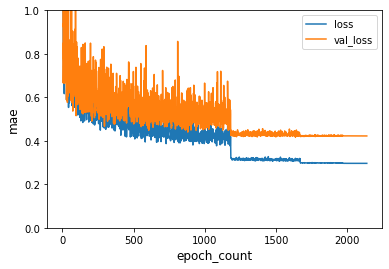

In [18]:
# Plot
h_cnn = history.history
history_df = pd.DataFrame(history.history)
ax= history_df.loc[:, ['loss', 'val_loss']].plot();
ax.set_ylim(0,1)
ax.set_xlabel(r'epoch_count',fontsize=12)
ax.set_ylabel(r'mae',fontsize=12)

In [19]:
# Apply model to predict the target field
Y_pred = model_m.predict(X_test)
Y_pred

array([[ 34.691963  ,   7.5599885 , -62.12654   ],
       [ 39.477154  , -35.129166  , -19.188812  ],
       [-22.70499   ,   9.273412  , -51.7869    ],
       [ 38.68789   , -35.737778  , -47.978996  ],
       [-18.13751   , -33.77707   ,  -3.913641  ],
       [-22.200157  ,   9.517519  , -39.917255  ],
       [ 38.7069    , -35.604607  , -45.160496  ],
       [ 40.3581    , -34.723454  ,   4.119526  ],
       [ 34.968826  ,   7.5617414 , -62.96012   ],
       [ 34.908173  ,   7.4047637 , -66.15645   ],
       [-22.283058  ,   9.674384  , -32.30949   ],
       [ 35.55996   ,   7.823215  , -47.530148  ],
       [-20.672619  ,  10.520413  ,   8.825816  ],
       [-20.629688  ,  10.4221735 ,   6.7157917 ],
       [-21.455273  ,  10.043806  , -12.632374  ],
       [ 37.932293  ,   9.250666  ,  19.806438  ],
       [-18.010057  , -33.637817  ,   2.8466454 ],
       [ 39.98065   , -35.072735  ,  -8.234805  ],
       [-17.231617  , -33.06363   ,  14.935723  ],
       [ 40.082176  , -34.70532

In [20]:
def mod(X):
    return np.sqrt((X**2).sum(axis=1))

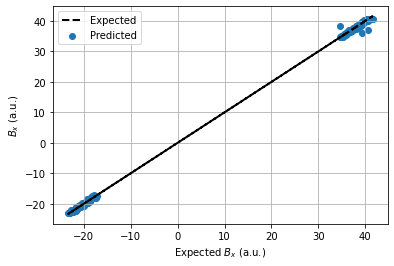

In [21]:
i = 0
fig, ax = plt.subplots()
ax.scatter(Y_test[:,i], Y_pred[:,i], label = 'Predicted')
ax.plot(Y_test[:,i], Y_test[:,i], linewidth=2.0, ls='--', label = 'Expected', color = 'black')
ax.set_ylabel(r'$B_x$ (a.u.)')
ax.set_xlabel(r'Expected $B_x$ (a.u.)')
ax.legend(loc=0)
ax.grid()

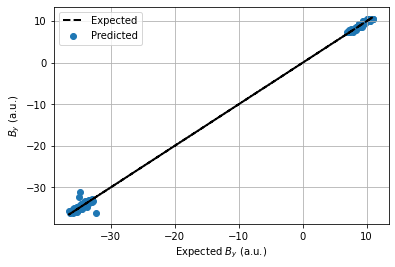

In [22]:
i = 1
fig, ax = plt.subplots()
ax.scatter(Y_test[:,i], Y_pred[:,i], label = 'Predicted')
ax.plot(Y_test[:,i], Y_test[:,i], linewidth=2.0, ls='--', label = 'Expected', color = 'black')
ax.set_ylabel(r'$B_y$ (a.u.)')
ax.set_xlabel(r'Expected $B_y$ (a.u.)')
ax.legend(loc=0)
ax.grid()

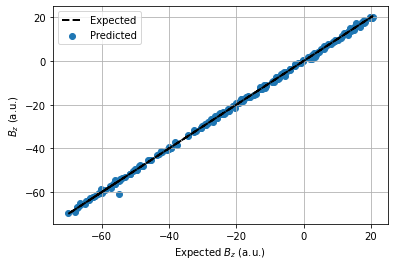

In [23]:
i = 2
fig, ax = plt.subplots()
ax.scatter(Y_test[:,i], Y_pred[:,i], label = 'Predicted')
ax.plot(Y_test[:,i], Y_test[:,i], linewidth=2.0, ls='--', label = 'Expected', color = 'black')
ax.set_ylabel(r'$B_z$ (a.u.)')
ax.set_xlabel(r'Expected $B_z$ (a.u.)')
ax.legend(loc=0)
ax.grid()

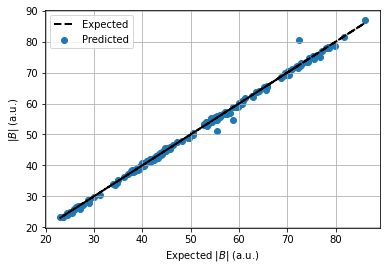

In [24]:
fig, ax = plt.subplots()
ax.scatter(mod(Y_test), mod(Y_pred), label = 'Predicted')
ax.plot(mod(Y_test), mod(Y_test), linewidth=2.0, ls='--', label = 'Expected', color = 'black')
ax.set_ylabel(r'$|B|$ (a.u.)')
ax.set_xlabel(r'Expected $|B|$ (a.u.)')
ax.legend(loc=0)
ax.grid()